In [7]:
!pip install ultralytics
!pip install opencv-python

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [9]:
import os
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO

In [3]:
def unzip_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Unzipped {zip_path} to {extract_to}")

zip_path = '/content/archive (3).zip'
extract_to = 'dataset'

# Create the extraction directory if it doesn't exist
if not os.path.exists(extract_to):
    os.makedirs(extract_to)

unzip_file(zip_path, extract_to)

Unzipped /content/archive (3).zip to dataset


In [4]:
# Load YOLOv10n model from scratch
model = YOLO("yolov10n.yaml")

# Train the model
model.train(data="/content/dataset/aquarium_pretrain/data.yaml", epochs=100, imgsz=640)

Ultralytics YOLOv8.2.49 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.yaml, data=/content/dataset/aquarium_pretrain/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

100%|██████████| 755k/755k [00:00<00:00, 123MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 275MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/dataset/aquarium_pretrain/train/labels... 448 images, 1 backgrounds, 0 corrupt: 100%|██████████| 448/448 [00:00<00:00, 1695.55it/s]

train: New cache created: /content/dataset/aquarium_pretrain/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/dataset/aquarium_pretrain/valid/labels... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<00:00, 1477.91it/s]

val: New cache created: /content/dataset/aquarium_pretrain/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.33G      8.332      12.72      8.546        200        640: 100%|██████████| 28/28 [00:20<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.26s/it]

                   all        127        909   7.55e-06    0.00193   3.84e-06   1.15e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.36G      8.049      12.05      8.273        148        640: 100%|██████████| 28/28 [00:11<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        127        909   4.98e-06    0.00193   2.54e-06   2.03e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.41G      7.477      10.86      7.756        150        640: 100%|██████████| 28/28 [00:10<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        127        909   4.38e-05     0.0149   2.33e-05   3.47e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.25G      7.019      10.22      7.122        193        640: 100%|██████████| 28/28 [00:10<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all        127        909   0.000189    0.00888   0.000105   3.68e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.32G      6.784      9.511      6.622        230        640: 100%|██████████| 28/28 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all        127        909    0.00065     0.0234   0.000478   0.000131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.46G      6.439      9.046      6.242        221        640: 100%|██████████| 28/28 [00:13<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        127        909      0.727     0.0103    0.00417    0.00101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.35G      6.454      8.792      5.896        241        640: 100%|██████████| 28/28 [00:13<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        127        909       0.45     0.0171    0.00898    0.00266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.14G      6.165      8.495       5.64        180        640: 100%|██████████| 28/28 [00:14<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        127        909      0.737     0.0295     0.0144     0.0043



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.31G      5.987      8.272      5.464        110        640: 100%|██████████| 28/28 [00:12<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

                   all        127        909      0.638     0.0379     0.0183    0.00579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.34G      5.925      8.046      5.294        225        640: 100%|██████████| 28/28 [00:12<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        127        909      0.702     0.0301     0.0372     0.0117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.47G      5.779      7.961      5.278        252        640: 100%|██████████| 28/28 [00:10<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        127        909      0.566     0.0443     0.0308    0.00909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.33G      5.688      7.782      5.106        181        640: 100%|██████████| 28/28 [00:10<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        127        909      0.508     0.0531     0.0381     0.0135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.35G      5.504      7.476        4.9        165        640: 100%|██████████| 28/28 [00:11<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        127        909      0.372     0.0596      0.035     0.0126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.33G      5.461      7.515      4.871        157        640: 100%|██████████| 28/28 [00:13<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        127        909      0.674     0.0468     0.0438     0.0156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.33G      5.373      7.253      4.757        147        640: 100%|██████████| 28/28 [00:13<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        127        909      0.678     0.0436     0.0429     0.0142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.37G      5.364      7.326      4.673        153        640: 100%|██████████| 28/28 [00:13<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all        127        909      0.663     0.0554     0.0479     0.0173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.28G      5.245      7.124      4.588        148        640: 100%|██████████| 28/28 [00:13<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        127        909      0.676     0.0631      0.052     0.0186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.22G      5.124      6.947      4.519        185        640: 100%|██████████| 28/28 [00:11<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        127        909      0.509     0.0479     0.0505     0.0183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.49G      5.143      6.808      4.436        240        640: 100%|██████████| 28/28 [00:10<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        127        909      0.547     0.0921     0.0673     0.0244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.22G      5.163      7.145      4.454        166        640: 100%|██████████| 28/28 [00:11<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all        127        909      0.613     0.0517     0.0672     0.0243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.49G      5.076      6.714      4.329        134        640: 100%|██████████| 28/28 [00:12<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        127        909      0.568     0.0824     0.0658     0.0239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.47G      4.976      6.588      4.237        193        640: 100%|██████████| 28/28 [00:13<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        127        909      0.555      0.117     0.0739     0.0282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.61G      4.936      6.598      4.301        164        640: 100%|██████████| 28/28 [00:14<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]

                   all        127        909      0.546     0.0898     0.0721     0.0262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.38G      4.891      6.687      4.239        398        640: 100%|██████████| 28/28 [00:13<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        127        909      0.556     0.0932     0.0874     0.0302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.19G      4.856      6.418      4.116        167        640: 100%|██████████| 28/28 [00:11<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        127        909       0.53     0.0705     0.0627     0.0245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.42G      4.828      6.402      4.146        185        640: 100%|██████████| 28/28 [00:09<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]

                   all        127        909      0.585      0.109      0.088     0.0337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.44G      4.777      6.361      4.125        222        640: 100%|██████████| 28/28 [00:11<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        127        909      0.535      0.109     0.0798     0.0315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.35G      4.655      6.206       4.04        300        640: 100%|██████████| 28/28 [00:12<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.51it/s]

                   all        127        909      0.554      0.128     0.0879     0.0347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.48G      4.706      6.289       4.03        176        640: 100%|██████████| 28/28 [00:14<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        127        909      0.552      0.121      0.083     0.0317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.23G      4.625      6.183      3.968        197        640: 100%|██████████| 28/28 [00:12<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all        127        909      0.518        0.1     0.0775     0.0317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.33G      4.558      5.963      3.877        148        640: 100%|██████████| 28/28 [00:13<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        127        909      0.567      0.131     0.0892     0.0354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       3.3G      4.554      5.967      3.966        333        640: 100%|██████████| 28/28 [00:12<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        127        909      0.418      0.135     0.0985     0.0407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.75G      4.535      5.889      3.893        177        640: 100%|██████████| 28/28 [00:11<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        127        909      0.554      0.143     0.0925     0.0381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.34G      4.448      5.812      3.812        177        640: 100%|██████████| 28/28 [00:09<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all        127        909      0.601      0.141      0.117      0.047



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.23G      4.502      5.792      3.761        160        640: 100%|██████████| 28/28 [00:11<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]

                   all        127        909      0.561      0.155      0.111     0.0459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.63G      4.434      5.754      3.773        167        640: 100%|██████████| 28/28 [00:12<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]

                   all        127        909      0.411      0.166      0.107     0.0429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       3.5G      4.364      5.559      3.726        197        640: 100%|██████████| 28/28 [00:13<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        127        909      0.416      0.143      0.109     0.0414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.49G      4.362      5.621       3.74        176        640: 100%|██████████| 28/28 [00:13<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        127        909       0.43      0.159      0.125     0.0519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.17G      4.441      5.719       3.68        224        640: 100%|██████████| 28/28 [00:13<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        127        909      0.565      0.166      0.114     0.0498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.62G      4.292      5.398      3.618        168        640: 100%|██████████| 28/28 [00:12<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        127        909      0.431      0.182      0.123     0.0527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.34G      4.341      5.587      3.671        281        640: 100%|██████████| 28/28 [00:11<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        127        909       0.61      0.161      0.147     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.32G        4.3      5.528      3.689        217        640: 100%|██████████| 28/28 [00:10<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        127        909      0.419       0.18      0.131     0.0578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.46G      4.277      5.441      3.661        242        640: 100%|██████████| 28/28 [00:11<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        127        909      0.476      0.191      0.137      0.057



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.53G      4.295      5.279      3.647        228        640: 100%|██████████| 28/28 [00:11<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        127        909      0.533      0.186      0.152     0.0614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.18G      4.181       5.24      3.531        237        640: 100%|██████████| 28/28 [00:13<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        127        909      0.496      0.192      0.154     0.0636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.33G      4.251      5.356      3.644        136        640: 100%|██████████| 28/28 [00:13<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        127        909      0.481      0.161      0.153     0.0656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.34G      4.266        5.3      3.574        227        640: 100%|██████████| 28/28 [00:13<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        127        909      0.559      0.199       0.16     0.0648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       3.4G      4.178      5.239      3.544        143        640: 100%|██████████| 28/28 [00:12<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        127        909       0.36      0.206      0.163     0.0715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.33G      4.178      5.332       3.56        299        640: 100%|██████████| 28/28 [00:11<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]

                   all        127        909      0.506      0.205      0.169     0.0715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.62G      4.194      5.236      3.549        159        640: 100%|██████████| 28/28 [00:10<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.33it/s]

                   all        127        909      0.451      0.204      0.177     0.0747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.21G      4.225      5.195      3.518        185        640: 100%|██████████| 28/28 [00:10<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        127        909      0.503      0.197      0.161      0.068



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.34G      4.208      5.047      3.499        224        640: 100%|██████████| 28/28 [00:13<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        127        909      0.501      0.232      0.195      0.087



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.17G      4.125      5.003      3.442        175        640: 100%|██████████| 28/28 [00:13<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all        127        909      0.447      0.217      0.189     0.0822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.36G      4.129      4.938      3.446        162        640: 100%|██████████| 28/28 [00:14<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.51it/s]

                   all        127        909      0.538      0.185      0.197     0.0846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.39G      4.166      5.027      3.554        215        640: 100%|██████████| 28/28 [00:13<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]

                   all        127        909      0.516      0.227      0.174     0.0753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.31G      4.087      4.935      3.479        132        640: 100%|██████████| 28/28 [00:11<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]

                   all        127        909      0.237      0.242      0.204     0.0876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.32G      4.074      4.908      3.418        250        640: 100%|██████████| 28/28 [00:10<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        127        909      0.463       0.23      0.195     0.0839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.41G      4.072      4.947       3.46        220        640: 100%|██████████| 28/28 [00:11<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all        127        909      0.337       0.25        0.2     0.0856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.34G      4.022      4.795       3.42        215        640: 100%|██████████| 28/28 [00:12<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        127        909      0.402      0.242      0.203      0.092



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.47G      4.095      4.869      3.447        207        640: 100%|██████████| 28/28 [00:13<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        127        909      0.422      0.235      0.212     0.0938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.33G      4.033      4.856      3.443        171        640: 100%|██████████| 28/28 [00:12<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all        127        909      0.336      0.275      0.231     0.0999



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.29G      4.017      4.761      3.378        214        640: 100%|██████████| 28/28 [00:13<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        127        909      0.344      0.277      0.229      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.32G      4.017      4.689      3.368        168        640: 100%|██████████| 28/28 [00:13<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all        127        909      0.397      0.291       0.25      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.36G      4.019      4.724       3.36        136        640: 100%|██████████| 28/28 [00:12<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        127        909      0.409      0.269      0.245      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.28G      4.038      4.774      3.378        117        640: 100%|██████████| 28/28 [00:12<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        127        909      0.316      0.275       0.23      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.27G      3.983      4.725      3.368        253        640: 100%|██████████| 28/28 [00:11<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]

                   all        127        909      0.299      0.284       0.23      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.32G      4.049      4.574      3.372        182        640: 100%|██████████| 28/28 [00:10<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]

                   all        127        909      0.373      0.273      0.243      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       3.6G      4.007      4.725      3.374        202        640: 100%|██████████| 28/28 [00:11<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        127        909       0.35      0.283      0.253      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.26G      3.974      4.547      3.306        152        640: 100%|██████████| 28/28 [00:12<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        127        909      0.344      0.304      0.249      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.45G      3.908      4.461      3.285        154        640: 100%|██████████| 28/28 [00:14<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        127        909      0.395      0.281      0.258      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.34G      3.915      4.451      3.299        148        640: 100%|██████████| 28/28 [00:15<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        127        909       0.36      0.312      0.265       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.48G      3.935      4.597      3.349        187        640: 100%|██████████| 28/28 [00:14<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        127        909       0.38      0.314      0.272      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.32G      3.905      4.445      3.308        243        640: 100%|██████████| 28/28 [00:13<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        127        909      0.347      0.314      0.264      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.43G      3.911      4.477      3.263        134        640: 100%|██████████| 28/28 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]

                   all        127        909       0.35      0.317      0.279      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.46G      3.919      4.537      3.296        187        640: 100%|██████████| 28/28 [00:10<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

                   all        127        909      0.364      0.329      0.267      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.45G      3.948      4.407      3.275        188        640: 100%|██████████| 28/28 [00:10<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        127        909      0.417       0.33      0.285      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.32G      3.845      4.455       3.28        132        640: 100%|██████████| 28/28 [00:11<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]

                   all        127        909      0.336      0.307       0.27       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.37G      3.804      4.327      3.267        161        640: 100%|██████████| 28/28 [00:13<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        127        909      0.368      0.365      0.289      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.34G      3.922      4.317      3.193        195        640: 100%|██████████| 28/28 [00:13<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        127        909       0.42      0.314      0.306      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.51G      3.927      4.384      3.222        220        640: 100%|██████████| 28/28 [00:13<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        127        909      0.375      0.337      0.291      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.52G      3.869      4.227       3.17        206        640: 100%|██████████| 28/28 [00:13<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        127        909      0.362      0.344      0.292      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.23G      3.893       4.31      3.239        224        640: 100%|██████████| 28/28 [00:11<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.39it/s]

                   all        127        909      0.386      0.327      0.291      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       3.4G      3.839      4.304      3.215        197        640: 100%|██████████| 28/28 [00:10<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        127        909      0.386      0.353      0.298      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.18G      3.815      4.347      3.227        159        640: 100%|██████████| 28/28 [00:10<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.26it/s]

                   all        127        909      0.385      0.352        0.3      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.43G      3.753      4.347      3.255        180        640: 100%|██████████| 28/28 [00:12<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        127        909      0.368      0.354       0.31      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.39G      3.814      4.225      3.216        130        640: 100%|██████████| 28/28 [00:13<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all        127        909      0.394      0.346      0.302      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.31G      3.854      4.158      3.147        230        640: 100%|██████████| 28/28 [00:13<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        127        909      0.417      0.364      0.306      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.25G      3.812      4.161      3.169        184        640: 100%|██████████| 28/28 [00:13<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.26it/s]

                   all        127        909      0.424      0.338      0.316      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.15G      3.742      4.246      3.197        259        640: 100%|██████████| 28/28 [00:12<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.39it/s]

                   all        127        909      0.407      0.331      0.308       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.37G      3.747      4.211      3.153        206        640: 100%|██████████| 28/28 [00:10<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]

                   all        127        909      0.414      0.333      0.319      0.145


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.32G       3.67      4.311      3.174         80        640: 100%|██████████| 28/28 [00:16<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        127        909      0.373      0.346      0.308      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.14G      3.641      4.192      3.138        131        640: 100%|██████████| 28/28 [00:10<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.39it/s]

                   all        127        909      0.389      0.333      0.303       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       3.2G      3.603      4.252      3.167        128        640: 100%|██████████| 28/28 [00:10<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        127        909      0.434      0.351      0.312      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.25G      3.554      4.111      3.125         87        640: 100%|██████████| 28/28 [00:12<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all        127        909      0.418      0.357      0.325      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.29G      3.584      4.159      3.201        164        640: 100%|██████████| 28/28 [00:13<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        127        909      0.406      0.365      0.328      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.17G      3.582      4.107      3.133         97        640: 100%|██████████| 28/28 [00:12<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        127        909      0.418      0.359      0.331      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.24G      3.647      4.063      3.137        132        640: 100%|██████████| 28/28 [00:12<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        127        909      0.411      0.379      0.334      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.23G      3.583      4.049      3.137        114        640: 100%|██████████| 28/28 [00:10<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        127        909      0.371      0.381      0.332      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.15G      3.523      4.061      3.135        104        640: 100%|██████████| 28/28 [00:09<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all        127        909      0.404      0.361      0.333      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.14G      3.494      4.049      3.146        133        640: 100%|██████████| 28/28 [00:10<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all        127        909      0.403      0.372      0.336      0.155



100 epochs completed in 0.452 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.49 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2697146 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.31s/it]


                   all        127        909      0.403      0.372      0.336      0.155
                  fish         63        459      0.446      0.444      0.397       0.19
             jellyfish          9        155      0.449      0.716      0.589      0.262
               penguin         17        104      0.387      0.413      0.328      0.114
                puffin         15         74      0.301      0.108      0.148     0.0605
                 shark         28         57      0.499      0.314      0.332      0.147
              starfish         17         27      0.387      0.333      0.262      0.167
              stingray         23         33      0.348      0.273      0.297      0.148
Speed: 0.4ms preprocess, 5.7ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79bec9d89e40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

In [15]:


# Load the trained model
model = YOLO('/content/runs/detect/train/weights/best.pt')  # The best weights file from training

# Load an image
image_path = '/content/dataset/aquarium_pretrain/test/images/IMG_2354_jpeg_jpg.rf.396e872c7fb0a95e911806986995ee7a.jpg'
image = Image.open(image_path)



0: 640x480 1 penguin, 10.5ms
Speed: 2.1ms preprocess, 10.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


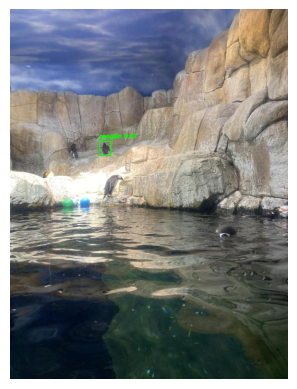

In [16]:

# Convert image to a format suitable for cv2
image_cv2 = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Make predictions
prediction_results = model(image)

# Extract boxes and labels
boxes = prediction_results[0].boxes.xyxy  # x1, y1, x2, y2 format
labels = prediction_results[0].boxes.cls  # class labels
scores = prediction_results[0].boxes.conf  # confidence scores
names = prediction_results[0].names  # class names

# Draw boxes and labels on the image
for box, label, score in zip(boxes, labels, scores):
    x1, y1, x2, y2 = map(int, box)
    class_name = names[int(label)]
    label_text = f"{class_name} {score:.2f}"
    color = (0, 255, 0)  # Green color for the bounding box
    cv2.rectangle(image_cv2, (x1, y1), (x2, y2), color, 2)
    cv2.putText(image_cv2, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Save the image with detections
output_image_path = 'output_with_detections.jpg'
cv2.imwrite(output_image_path, image_cv2)

# Display the image with detections
plt.imshow(cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()